# **Gold Stock Price Historical Data**


### Dataset Link
https://in.investing.com/commodities/gold-mini-historical-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from fbprophet import Prophet

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Projects/Gold/Gold Price.txt', delimiter='\t')
df

,Date,Close,Open,High,Low,Volume,Chg%
0,"Apr 16, 2021","47,022","46,808","47,097","46,511",23.54K,0.30%
1,"Apr 15, 2021","46,881","46,370","46,973","46,370",21.62K,1.22%
2,"Apr 14, 2021","46,317","46,650","46,659","46,180",12.63K,-0.76%
3,"Apr 13, 2021","46,674","46,202","46,750","46,125",20.25K,1.05%
4,"Apr 12, 2021","46,188","46,333","46,514","46,162",18.01K,-0.34%
...,...,...,...,...,...,...,...
1571,"Mar 06, 2015","26,058","26,485","26,530","26,025",15.68K,-1.57%
1572,"Mar 05, 2015","26,473","26,510","26,599","26,418",0.22K,-0.25%
1573,"Mar 04, 2015","26,539","26,500","26,600","26,401",3.30K,0.33%
1574,"Mar 03, 2015","26,453","26,527","26,601","26,400",1.05K,-0.33%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1576 non-null   object
 1   Close   1576 non-null   object
 2   Open    1576 non-null   object
 3   High    1576 non-null   object
 4   Low     1576 non-null   object
 5   Volume  1576 non-null   object
 6   Chg%    1576 non-null   object
dtypes: object(7)
memory usage: 86.3+ KB


# **Data Prepration**

In [5]:
df = df.loc[::-1]
df.reset_index(inplace = True, drop = True)
df

,Date,Close,Open,High,Low,Volume,Chg%
0,"Mar 02, 2015","26,541","26,508","26,997","26,440",5.08K,0.23%
1,"Mar 03, 2015","26,453","26,527","26,601","26,400",1.05K,-0.33%
2,"Mar 04, 2015","26,539","26,500","26,600","26,401",3.30K,0.33%
3,"Mar 05, 2015","26,473","26,510","26,599","26,418",0.22K,-0.25%
4,"Mar 06, 2015","26,058","26,485","26,530","26,025",15.68K,-1.57%
...,...,...,...,...,...,...,...
1571,"Apr 12, 2021","46,188","46,333","46,514","46,162",18.01K,-0.34%
1572,"Apr 13, 2021","46,674","46,202","46,750","46,125",20.25K,1.05%
1573,"Apr 14, 2021","46,317","46,650","46,659","46,180",12.63K,-0.76%
1574,"Apr 15, 2021","46,881","46,370","46,973","46,370",21.62K,1.22%


In [6]:
df['Date'] = df['Date'].str.replace(',','')
df['Date'] = df['Date'].str.replace('Jan','01')
df['Date'] = df['Date'].str.replace('Feb','02')
df['Date'] = df['Date'].str.replace('Mar','03')
df['Date'] = df['Date'].str.replace('Apr','04')
df['Date'] = df['Date'].str.replace('May','05')
df['Date'] = df['Date'].str.replace('Jun','06')
df['Date'] = df['Date'].str.replace('Jul','07')
df['Date'] = df['Date'].str.replace('Aug','08')
df['Date'] = df['Date'].str.replace('Sep','09')
df['Date'] = df['Date'].str.replace('Oct','10')
df['Date'] = df['Date'].str.replace('Nov','11')
df['Date'] = df['Date'].str.replace('Dec','12')

for column in ['Close', 'Open', 'High', 'Low']:
  df[column] = df[column].str.replace(',', '')
  df[column] = df[column].astype('int')

df['Volume'] = df['Volume'].str.replace('K','')
df['Volume'] = df['Volume'].astype('float') * 1000
df['Volume'] = df['Volume'].astype('int')

df['Chg%'] = df['Chg%'].str.replace('%','')
df['Chg%'] = df['Chg%'].astype('float')

df[['Month', 'Day', 'Year']] = df['Date'].str.split(expand=True)
df['Date'] = df[['Year', 'Month', 'Day']].apply(lambda x: '-'.join(x.values.astype(str)), axis=1)
df.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

df

,Date,Close,Open,High,Low,Volume,Chg%
0,2015-03-02,26541,26508,26997,26440,5080,0.23
1,2015-03-03,26453,26527,26601,26400,1050,-0.33
2,2015-03-04,26539,26500,26600,26401,3300,0.33
3,2015-03-05,26473,26510,26599,26418,220,-0.25
4,2015-03-06,26058,26485,26530,26025,15680,-1.57
...,...,...,...,...,...,...,...
1571,2021-04-12,46188,46333,46514,46162,18010,-0.34
1572,2021-04-13,46674,46202,46750,46125,20250,1.05
1573,2021-04-14,46317,46650,46659,46180,12630,-0.76
1574,2021-04-15,46881,46370,46973,46370,21620,1.22


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1576 non-null   datetime64[ns]
 1   Close   1576 non-null   int64         
 2   Open    1576 non-null   int64         
 3   High    1576 non-null   int64         
 4   Low     1576 non-null   int64         
 5   Volume  1576 non-null   int64         
 6   Chg%    1576 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 86.3 KB


# **Extensive EDA**

In [9]:
df

,Date,Close,Open,High,Low,Volume,Chg%
0,2015-03-02,26541,26508,26997,26440,5080,0.23
1,2015-03-03,26453,26527,26601,26400,1050,-0.33
2,2015-03-04,26539,26500,26600,26401,3300,0.33
3,2015-03-05,26473,26510,26599,26418,220,-0.25
4,2015-03-06,26058,26485,26530,26025,15680,-1.57
...,...,...,...,...,...,...,...
1571,2021-04-12,46188,46333,46514,46162,18010,-0.34
1572,2021-04-13,46674,46202,46750,46125,20250,1.05
1573,2021-04-14,46317,46650,46659,46180,12630,-0.76
1574,2021-04-15,46881,46370,46973,46370,21620,1.22


In [10]:
df.describe()

,Close,Open,High,Low,Volume,Chg%
count,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000
mean,33722.456218,33723.295685,33911.209391,33526.140863,14089.340736,0.040082
std,7710.533138,7710.019925,7783.778926,7615.996196,12369.853503,0.838461
min,24545.000000,24583.000000,24635.000000,24470.000000,0.000000,-5.610000
25%,28792.500000,28795.000000,28923.750000,28652.250000,6572.500000,-0.410000
50%,30618.500000,30631.500000,30794.000000,30500.500000,11040.000000,0.030000
75%,37939.250000,37899.250000,38147.750000,37736.000000,19225.000000,0.480000
max,56117.000000,56351.000000,56499.000000,55400.000000,106920.000000,5.300000


## How much price (%) is fluctuating???


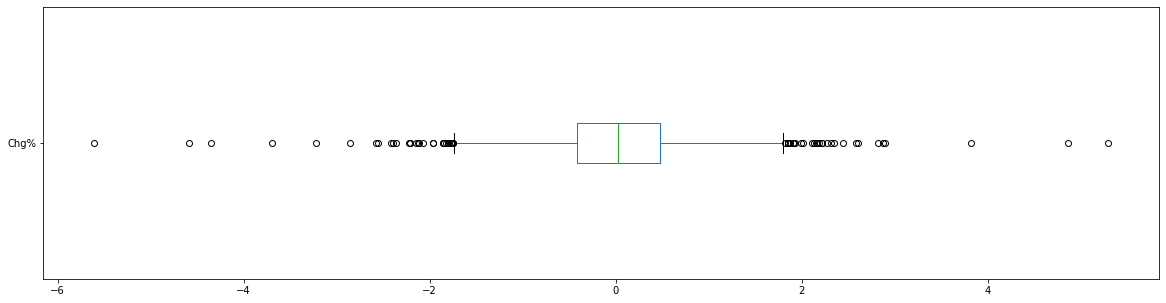

In [11]:
df['Chg%'].plot(kind='box', vert=False, figsize=(20,5))

## The max change, min and avg change since 2015 ?

Change in %.

In [12]:
df['Chg%'].max()

5.3

In [13]:
df['Chg%'].min()

-5.61

In [14]:
df['Chg%'].mean()

0.040082487309644685

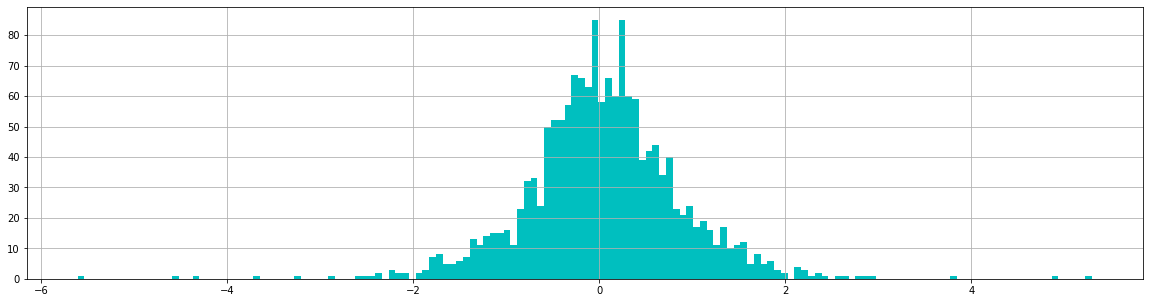

In [15]:
df['Chg%'].hist(bins=150, figsize=(20,5), color='c')

## How volume affects change?

Text(0, 0.5, 'Volume')

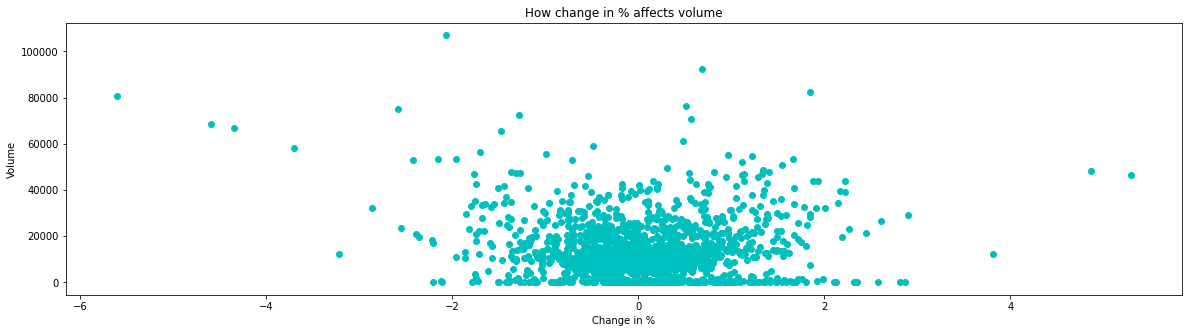

In [16]:
plt.figure(figsize=(20,5))
plt.plot(df['Chg%'], df['Volume'], 'oc')
plt.title('How change in % affects volume')
plt.xlabel('Change in %')
plt.ylabel('Volume')

## Price

Text(0, 0.5, 'Price')

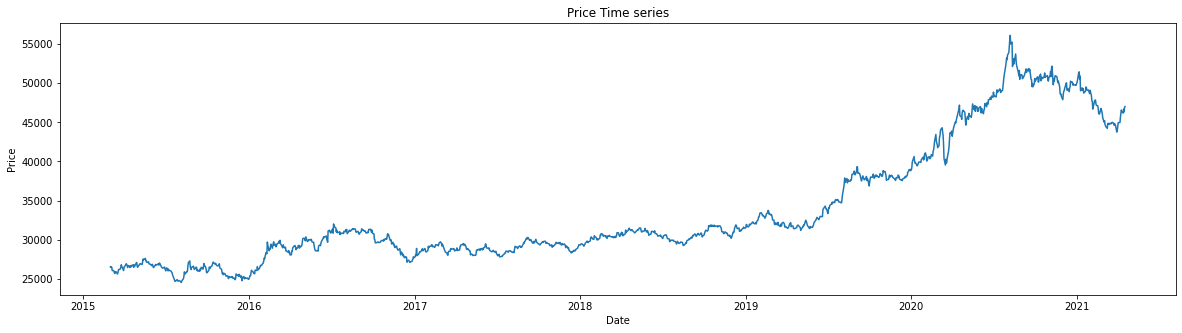

In [17]:
plt.figure(figsize=(20,5))
plt.plot(df['Date'], df['Close'], '-')
plt.title('Price Time series')
plt.xlabel('Date')
plt.ylabel('Price')

## How much diffrence in high, low, open, close prices.

Text(0, 0.5, 'Price')

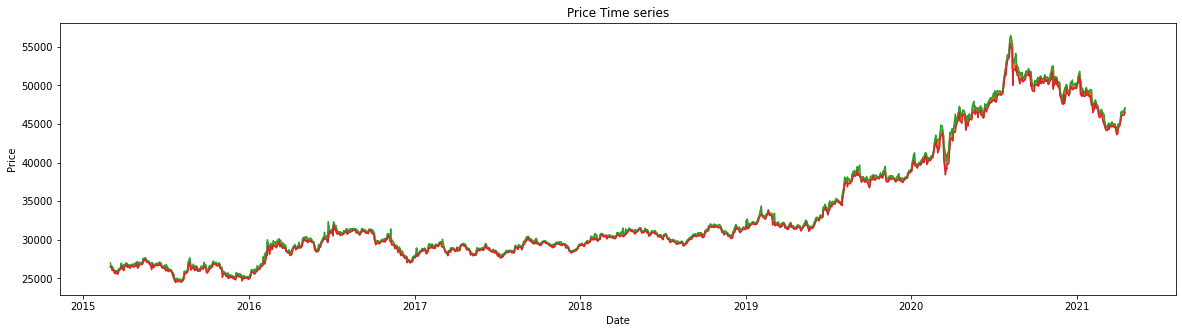

In [18]:
plt.figure(figsize=(20,5))
plt.plot(df['Date'], df['Close'], '-')
plt.plot(df['Date'], df['Open'], '-')
plt.plot(df['Date'], df['High'], '-')
plt.plot(df['Date'], df['Low'], '-')
plt.title('Price Time series')
plt.xlabel('Date')
plt.ylabel('Price')

It seems almost the same with very low order of diffrence.

## Diffrence between open and close.

Diffrence between open and close.

{'boxes': [<matplotlib.lines.Line2D at 0x7f53a0847a90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f53a084ead0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f53a0854b10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f53a08545d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f53a084e050>,
  <matplotlib.lines.Line2D at 0x7f53a084e590>]}

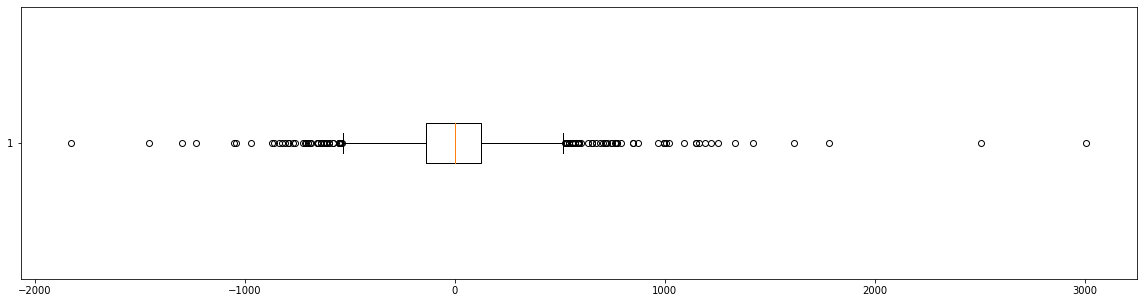

In [19]:
plt.figure(figsize=(20,5))
plt.boxplot((df['Open']-df['Close']), vert=0)

Percentage diffrence between open close.

Text(0.5, 1.0, 'Price change (High-Low) %')

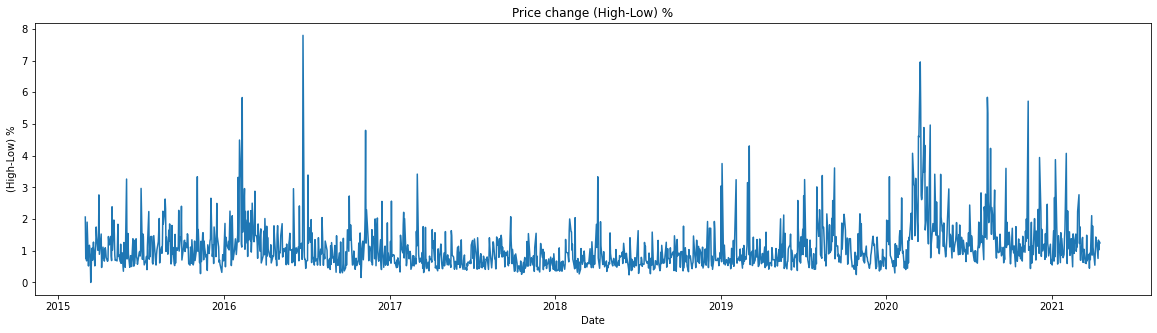

In [20]:
plt.figure(figsize=(20,5))
plt.plot(df['Date'], (100-(df['Low']/df['High'])*100))
plt.xlabel('Date')
plt.ylabel('(High-Low) %')
plt.title('Price change (High-Low) %')

# **Forecasting Facebook Prophet**

In [21]:
df.drop(['Open', 'High', 'Low', 'Volume', 'Chg%'], axis=1, inplace=True)

In [22]:
df.rename({'Date': 'ds', 'Close': 'y'}, axis=1, inplace=True)
df

,ds,y
0,2015-03-02,26541
1,2015-03-03,26453
2,2015-03-04,26539
3,2015-03-05,26473
4,2015-03-06,26058
...,...,...
1571,2021-04-12,46188
1572,2021-04-13,46674
1573,2021-04-14,46317
1574,2021-04-15,46881


In [23]:
m = Prophet(daily_seasonality=True) 
m.fit(df)

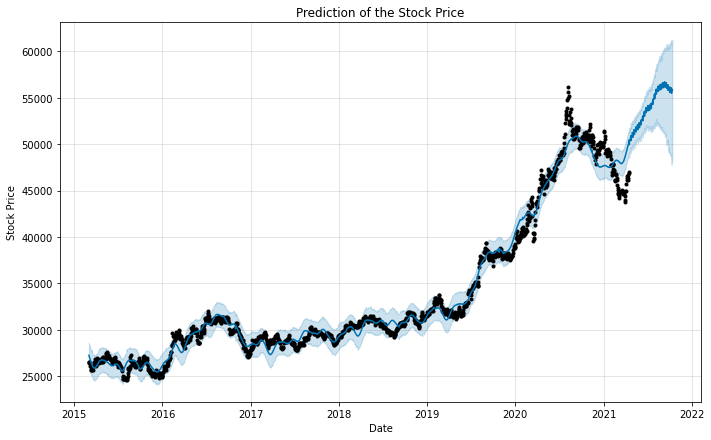

In [26]:
future = m.make_future_dataframe(periods=180) 
prediction = m.predict(future)
m.plot(prediction)

plt.title("Prediction of the Stock Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()


For next six months it is in up trend.

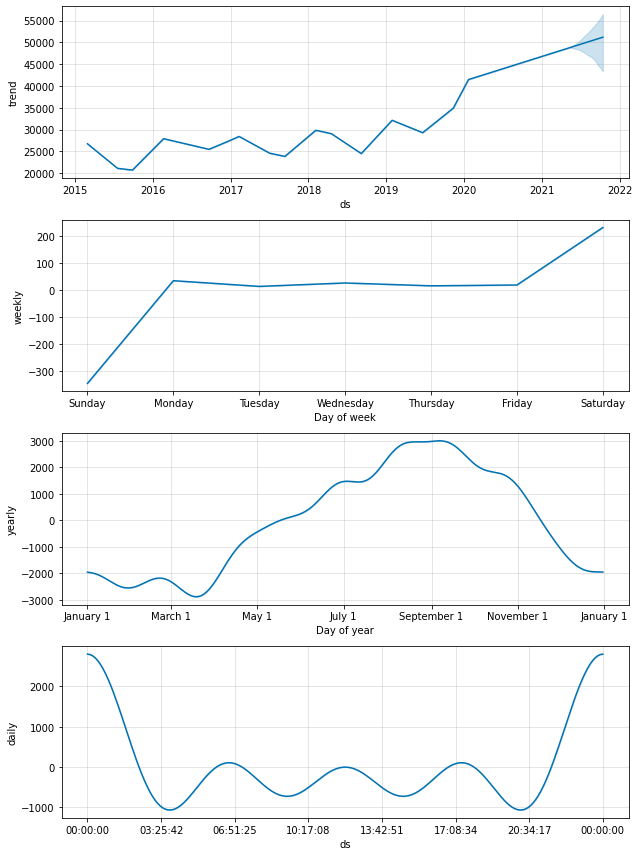

In [27]:
m.plot_components(prediction)
plt.show()